In [1]:
!pip install -r requirements.txt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 24.5 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.1/566.1 kB 16.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 28.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 24.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [sentence-transformers]ence-transformers]


In [2]:
import sys
!{sys.executable} -m pip install numpy --upgrade
!{sys.executable} -m pip install torch --upgrade --force-reinstall


  Using cached numpy-2.3.4-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
Using cached numpy-2.3.4-cp313-cp313-macosx_14_0_arm64.whl (5.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.2
    Uninstalling numpy-2.3.2:
      Successfully uninstalled numpy-2.3.2
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached markupsafe-3.0.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (2.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 MB 17.4 MB/s  0:00:04m0:00:0100:01
Using cached networkx-3.5-py3-none-any.whl (2.0 MB)
Using cached sympy-1.14.0-py3-none-any.whl (6.3 MB)
Using cached mpmath-1.3.0-py3-none-

In [3]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re, string
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sentence_transformers import SentenceTransformer
import warnings
warnings.filterwarnings("ignore")



In [4]:
import nltk
# Download required datasets
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jordanandrew/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/jordanandrew/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jordanandrew/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jordanandrew/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jordanandrew/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [5]:
data = pd.read_csv('data/cleaned_data.csv')
data.head()


,Unnamed: 0,statement,status,cleaned_statement
0,0,oh my gosh,Anxiety,oh my gosh
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,trouble sleeping confused mind restless heart ...
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,all wrong back off dear forward doubt stay in ...
3,3,I've shifted my focus to something else but I'...,Anxiety,i have shifted my focus to something else but ...
4,4,"I'm restless and restless, it's been a month n...",Anxiety,i am restless and restless it is been a month ...


### Step 1: Preprocess Text ###

In [6]:
# Basic cleaning
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)              # remove links
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words and w.isalpha()]
    return tokens

data['tokens'] = data['cleaned_statement'].astype(str).apply(clean_text)


In [7]:
data.head()

,Unnamed: 0,statement,status,cleaned_statement,tokens
0,0,oh my gosh,Anxiety,oh my gosh,"[oh, gosh]"
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,trouble sleeping confused mind restless heart ...,"[trouble, sleeping, confused, mind, restless, ..."
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,all wrong back off dear forward doubt stay in ...,"[wrong, back, dear, forward, doubt, stay, rest..."
3,3,I've shifted my focus to something else but I'...,Anxiety,i have shifted my focus to something else but ...,"[shifted, focus, something, else, still, worried]"
4,4,"I'm restless and restless, it's been a month n...",Anxiety,i am restless and restless it is been a month ...,"[restless, restless, month, boy, mean]"


### Step 2: Create Dictionary and Corpus for LDA ###

In [8]:
from gensim import corpora

#dictionary maps words to integer IDs.
dictionary = corpora.Dictionary(data['tokens'])
# corpus is a list of “bag-of-words” frequency vectors for each document.
corpus = [dictionary.doc2bow(text) for text in data['tokens']]


In [9]:
corpus[:2]  # Display the first two documents in the corpus

[[(0, 1), (1, 1)], [(2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]]

### Step 3: Train LDA Model ###

In [10]:
from gensim.models.ldamodel import LdaModel

lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=7,      # you can tune this
    passes=10,
    random_state=42
)


### Step 4: View the Topics ###

In [11]:
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")


Topic 0: 0.016*"take" + 0.013*"trying" + 0.012*"back" + 0.012*"experience" + 0.012*"started" + 0.011*"attack" + 0.010*"got" + 0.008*"went" + 0.008*"school" + 0.008*"would"
Topic 1: 0.024*"people" + 0.020*"want" + 0.020*"know" + 0.019*"life" + 0.016*"friend" + 0.015*"would" + 0.014*"one" + 0.013*"like" + 0.012*"even" + 0.011*"never"
Topic 2: 0.053*"feel" + 0.046*"like" + 0.019*"get" + 0.019*"feeling" + 0.014*"know" + 0.014*"day" + 0.013*"want" + 0.012*"even" + 0.012*"work" + 0.011*"time"
Topic 3: 0.018*"year" + 0.016*"time" + 0.013*"week" + 0.013*"really" + 0.011*"day" + 0.010*"get" + 0.009*"also" + 0.008*"last" + 0.008*"think" + 0.008*"going"
Topic 4: 0.044*"job" + 0.024*"wish" + 0.020*"deal" + 0.019*"ill" + 0.019*"money" + 0.019*"live" + 0.014*"state" + 0.013*"energy" + 0.012*"super" + 0.010*"eat"
Topic 5: 0.043*"fucking" + 0.041*"recently" + 0.038*"put" + 0.026*"either" + 0.024*"kill" + 0.020*"physical" + 0.018*"group" + 0.018*"shit" + 0.017*"type" + 0.015*"noticed"
Topic 6: 0.077*"a

### Step 5: Get Topic Distribution for each Document ###

In [12]:
topics_per_doc = [lda_model.get_document_topics(doc) for doc in corpus]

# Convert to a dense DataFrame
import numpy as np
topic_vectors = np.zeros((len(topics_per_doc), lda_model.num_topics))
for i, doc_topics in enumerate(topics_per_doc):
    for topic_num, prob in doc_topics:
        topic_vectors[i, topic_num] = prob

lda_features = pd.DataFrame(topic_vectors, columns=[f"Topic_{i}" for i in range(lda_model.num_topics)])
lda_features.head()


,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6
0,0.047655,0.047655,0.047655,0.047663,0.380485,0.381231,0.047655
1,0.017885,0.017870,0.892686,0.017906,0.017869,0.017867,0.017918
2,0.014329,0.326335,0.267467,0.348962,0.014317,0.014294,0.014294
3,0.020502,0.467824,0.200213,0.250133,0.020442,0.020442,0.020443
4,0.340306,0.024005,0.540273,0.023870,0.023821,0.023859,0.023866


In [13]:
data_with_topics = pd.concat([data.reset_index(drop=True), lda_features], axis=1)
data_with_topics.head()


,Unnamed: 0,statement,status,cleaned_statement,tokens,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6
0,0,oh my gosh,Anxiety,oh my gosh,"[oh, gosh]",0.047655,0.047655,0.047655,0.047663,0.380485,0.381231,0.047655
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,trouble sleeping confused mind restless heart ...,"[trouble, sleeping, confused, mind, restless, ...",0.017885,0.017870,0.892686,0.017906,0.017869,0.017867,0.017918
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,all wrong back off dear forward doubt stay in ...,"[wrong, back, dear, forward, doubt, stay, rest...",0.014329,0.326335,0.267467,0.348962,0.014317,0.014294,0.014294
3,3,I've shifted my focus to something else but I'...,Anxiety,i have shifted my focus to something else but ...,"[shifted, focus, something, else, still, worried]",0.020502,0.467824,0.200213,0.250133,0.020442,0.020442,0.020443
4,4,"I'm restless and restless, it's been a month n...",Anxiety,i am restless and restless it is been a month ...,"[restless, restless, month, boy, mean]",0.340306,0.024005,0.540273,0.023870,0.023821,0.023859,0.023866


### Visualize Topics ###

In [14]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.215175 -0.063303       1        1  29.713190
3      0.193707  0.008002       2        1  22.653470
2      0.206551 -0.017204       3        1  21.726291
0      0.092856  0.014855       4        1  13.234470
6     -0.169824  0.368316       5        1   4.857026
4     -0.205831 -0.209330       6        1   4.650688
5     -0.332633 -0.101335       7        1   3.164865, topic_info=         Term          Freq         Total Category  logprob  loglift
33       feel  35284.000000  35284.000000  Default  30.0000  30.0000
124   anxiety  14298.000000  14298.000000  Default  29.0000  29.0000
28       like  40746.000000  40746.000000  Default  28.0000  28.0000
230    people  19213.000000  19213.000000  Default  27.0000  27.0000
673       job   7469.000000   7469.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
790      shit   1462.173339   3082.186664   Topic7  -4.0414   2.7073
4497   common    503.888533    673.119300   Topic7  -5.1067   3.1635
176       god    542.327734   1177.853818   Topic7  -5.0332   2.6775
179    please    743.867215   3208.764052   Topic7  -4.7172   1.9913
1009   trying    579.164447   4948.820861   Topic7  -4.9675   1.3077

[450 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
4294       1  0.999239     act
4739       7  0.998738  acting
10310      3  0.025076    adhd
10310      4  0.003134    adhd
10310      5  0.970117    adhd
...      ...       ...     ...
376        3  0.042099    year
376        4  0.102319    year
376        5  0.003202    year
376        6  0.006199    year
10261      5  0.997598  zoloft

[759 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1, 7, 5, 6])

## Generate Contextual Embeddings Using BERT ##

In [15]:
# Generate BERT embeddings
df = data_with_topics.copy()

# Convert cleaned statements to string just in case
statements = df["cleaned_statement"].astype(str).tolist()
model = SentenceTransformer('all-MiniLM-L6-v2')  # 384-dim embeddings

bert_embeddings = model.encode(statements, show_progress_bar=True)
bert_embeddings = np.array(bert_embeddings)

print("BERT embedding shape:", bert_embeddings.shape)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1658 [00:00<?, ?it/s]

BERT embedding shape: (53043, 384)


In [16]:
# extract lda topic vectors
topic_cols = [c for c in df.columns if c.startswith("Topic_")]
lda_features = df[topic_cols].values

print("LDA feature shape:", lda_features.shape)


LDA feature shape: (53043, 7)


In [17]:
# combine BERT embeddings and LDA features
combined_features = np.concatenate([bert_embeddings, lda_features], axis=1)
print("Combined feature shape:", combined_features.shape)


Combined feature shape: (53043, 391)


In [32]:
# train test split
X = combined_features
y = df["status"]   

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [33]:
# train hybrid classifier 
clf = LogisticRegression(
    max_iter=5000,
    class_weight='balanced',
    n_jobs=-1
)

clf.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


In [35]:
y_pred = clf.predict(X_test)

print("HYBRID MODEL PERFORMANCE (LDA + BERT):\n")
print(classification_report(y_test, y_pred))


HYBRID MODEL PERFORMANCE (LDA + BERT):

                      precision    recall  f1-score   support

             Anxiety       0.69      0.78      0.73       778
             Bipolar       0.59      0.74      0.66       575
          Depression       0.74      0.51      0.60      3081
              Normal       0.91      0.90      0.91      3270
Personality disorder       0.27      0.75      0.40       240
              Stress       0.41      0.67      0.51       534
            Suicidal       0.63      0.65      0.64      2131

            accuracy                           0.70     10609
           macro avg       0.61      0.71      0.64     10609
        weighted avg       0.73      0.70      0.71     10609



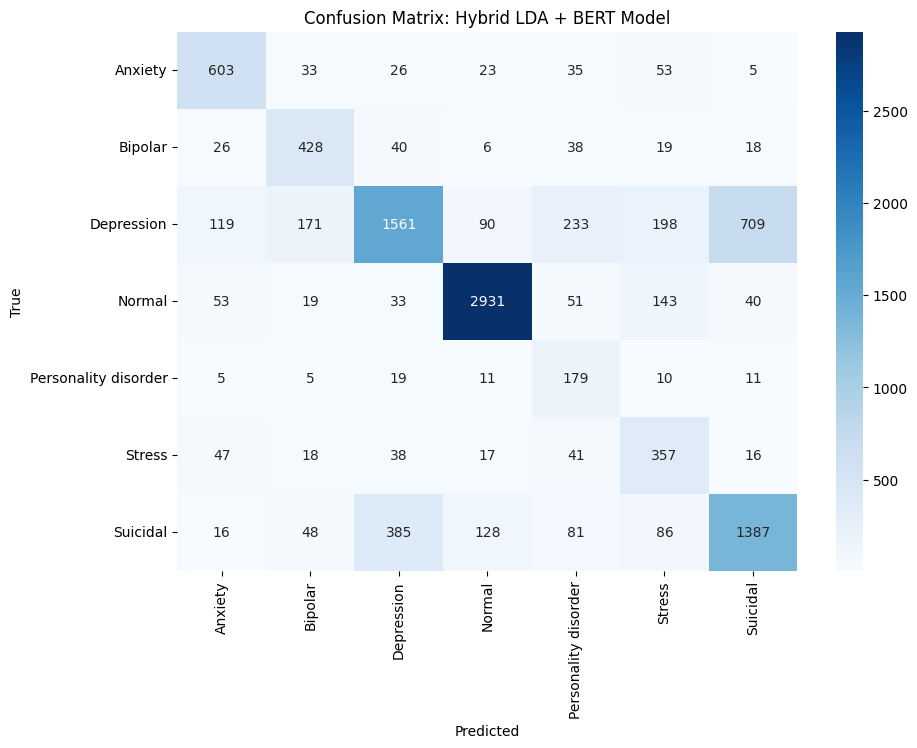

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=clf.classes_, yticklabels=clf.classes_, cmap="Blues")
plt.title("Confusion Matrix: Hybrid LDA + BERT Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [37]:
# train test split for only BERT embeddings
X = bert_embeddings
y = df["status"]  # your labels

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [38]:
# train BERT-only classifier

clf_bert = LogisticRegression(
    max_iter=5000,
    class_weight='balanced',
    n_jobs=-1
)

clf_bert.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


In [39]:
# make predictions and evaluate BERT-only model

y_pred = clf_bert.predict(X_test)

print("LOGISTIC REGRESSION ON BERT EMBEDDINGS:\n")
print(classification_report(y_test, y_pred))

LOGISTIC REGRESSION ON BERT EMBEDDINGS:

                      precision    recall  f1-score   support

             Anxiety       0.69      0.77      0.73       778
             Bipolar       0.59      0.74      0.66       575
          Depression       0.74      0.50      0.60      3081
              Normal       0.91      0.90      0.91      3270
Personality disorder       0.27      0.75      0.40       240
              Stress       0.41      0.66      0.50       534
            Suicidal       0.64      0.65      0.64      2131

            accuracy                           0.70     10609
           macro avg       0.61      0.71      0.63     10609
        weighted avg       0.73      0.70      0.71     10609

